# Textures and local image statistics

In [1]:
import math
import os
import matplotlib.pyplot as plt
import nibabel
import numpy as np

from ia_mri_tools.features import input_normalization, riff

plt.ion()
plt.style.use('seaborn-white')

def im_show(h, n, m, i, title=None, colorbar=True, vmin=-100, vmax=100):
    plt.subplot(n, m, i)
    plt.imshow(h[:, ::-1].transpose(), cmap='gray', vmin=vmin, vmax=vmax)
    plt.axis('off')
    if title:
        plt.title(title)
    if colorbar:
        plt.colorbar()


def im_show_scale(h, n, m, i, title=None, colorbar=True, pmin=2, pmax=98):
    plt.subplot(n, m, i)
    plt.imshow(h[:, ::-1].transpose(), cmap='gray', vmin=np.percentile(h, pmin), vmax=np.percentile(h, pmax))
    plt.axis('off')
    if title:
        plt.title(title)
    if colorbar:
        plt.colorbar()

def hist_show(d, n, m, i, title=None, min_val=None, max_val=None, bins=50):

    h = d.ravel()
    if min_val:
        h = h[h >= min_val]
    if max_val:
        h = h[h <= max_val]

    plt.subplot(n, m, i)
    plt.hist(h, bins=bins)
    if title:
        plt.title(title)

def load_data(dset, z=None, data_path='data/HCP/100307'):
    """

    :param dset: string 'T1', 'T2', 'T1r', 'T2r', or 'aparc+aseg'
    :param z: integer slice number
    :param data_path: path to the data
    :return: data as a numpy array
    """

    if dset == 'T1':
        dset_path = os.path.join(data_path, 'T1w_acpc_dc.nii.gz')
    elif dset == 'T2':
        dset_path = os.path.join(data_path, 'T2w_acpc_dc.nii.gz')
    elif dset == 'T1r':
        dset_path = os.path.join(data_path, 'T1w_acpc_dc_restore.nii.gz')
    elif dset == 'T2r':
        dset_path = os.path.join(data_path, 'T2w_acpc_dc_restore.nii.gz')
    elif dset == 'aparc+aseg':
        dset_path = os.path.join(data_path, 'aparc+aseg.nii.gz')
    else:
        raise NameError('Unknown data set name.')

    # read the volume
    data = nibabel.load(dset_path).get_data()
    # select a slice if needed
    if z:
        data = data[:, :, z]

    return data



In [2]:
# Load a slice from an image and convert to float.
t1  = load_data('T1', z=110).astype('float32')
t2  = load_data('T2', z=110).astype('float32')

# Set the number of desired scales
nscales = 4

## Input Stage: Local Gain Control

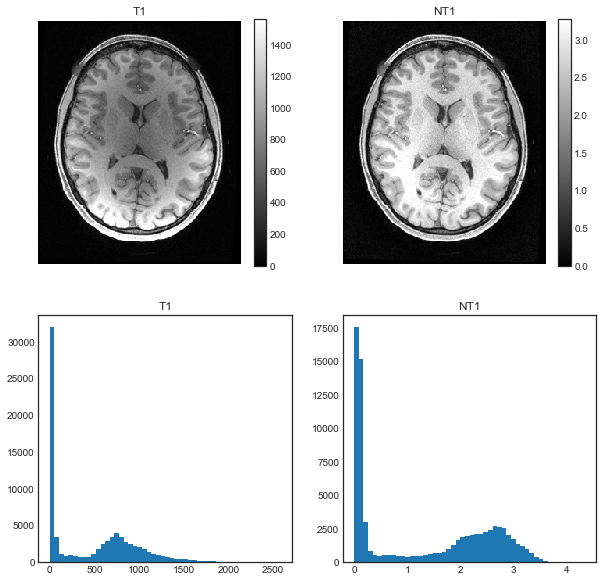

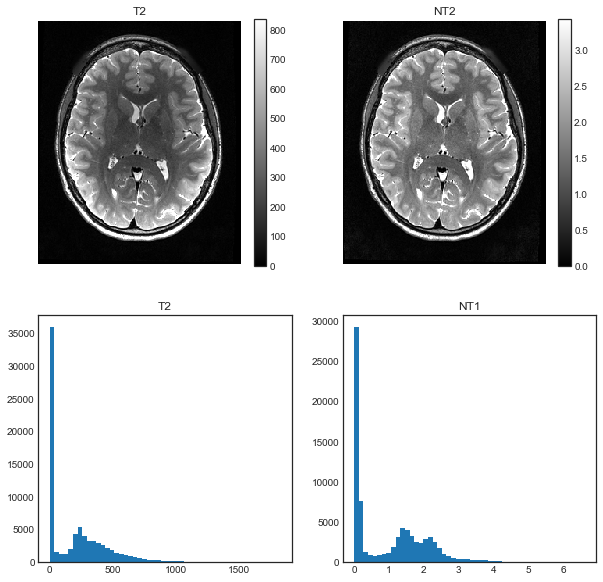

In [3]:
norm_t1 = input_normalization(t1, nscales, high_pass_output=False)
norm_t2 = input_normalization(t2, nscales, high_pass_output=False)

plt.figure(figsize=[2*5,2*5])
im_show_scale(t1, 2,2,1, 'T1')
im_show_scale(norm_t1, 2,2,2, 'NT1')
hist_show(t1, 2,2,3, 'T1')
hist_show(norm_t1, 2,2,4, 'NT1')

plt.figure(figsize=[2*5,2*5])
im_show_scale(t2, 2,2,1, 'T2')
im_show_scale(norm_t2, 2,2,2, 'NT2')
hist_show(t2, 2,2,3, 'T2')
hist_show(norm_t2, 2,2,4, 'NT1')


## Rotationally Invariant Frontend Features

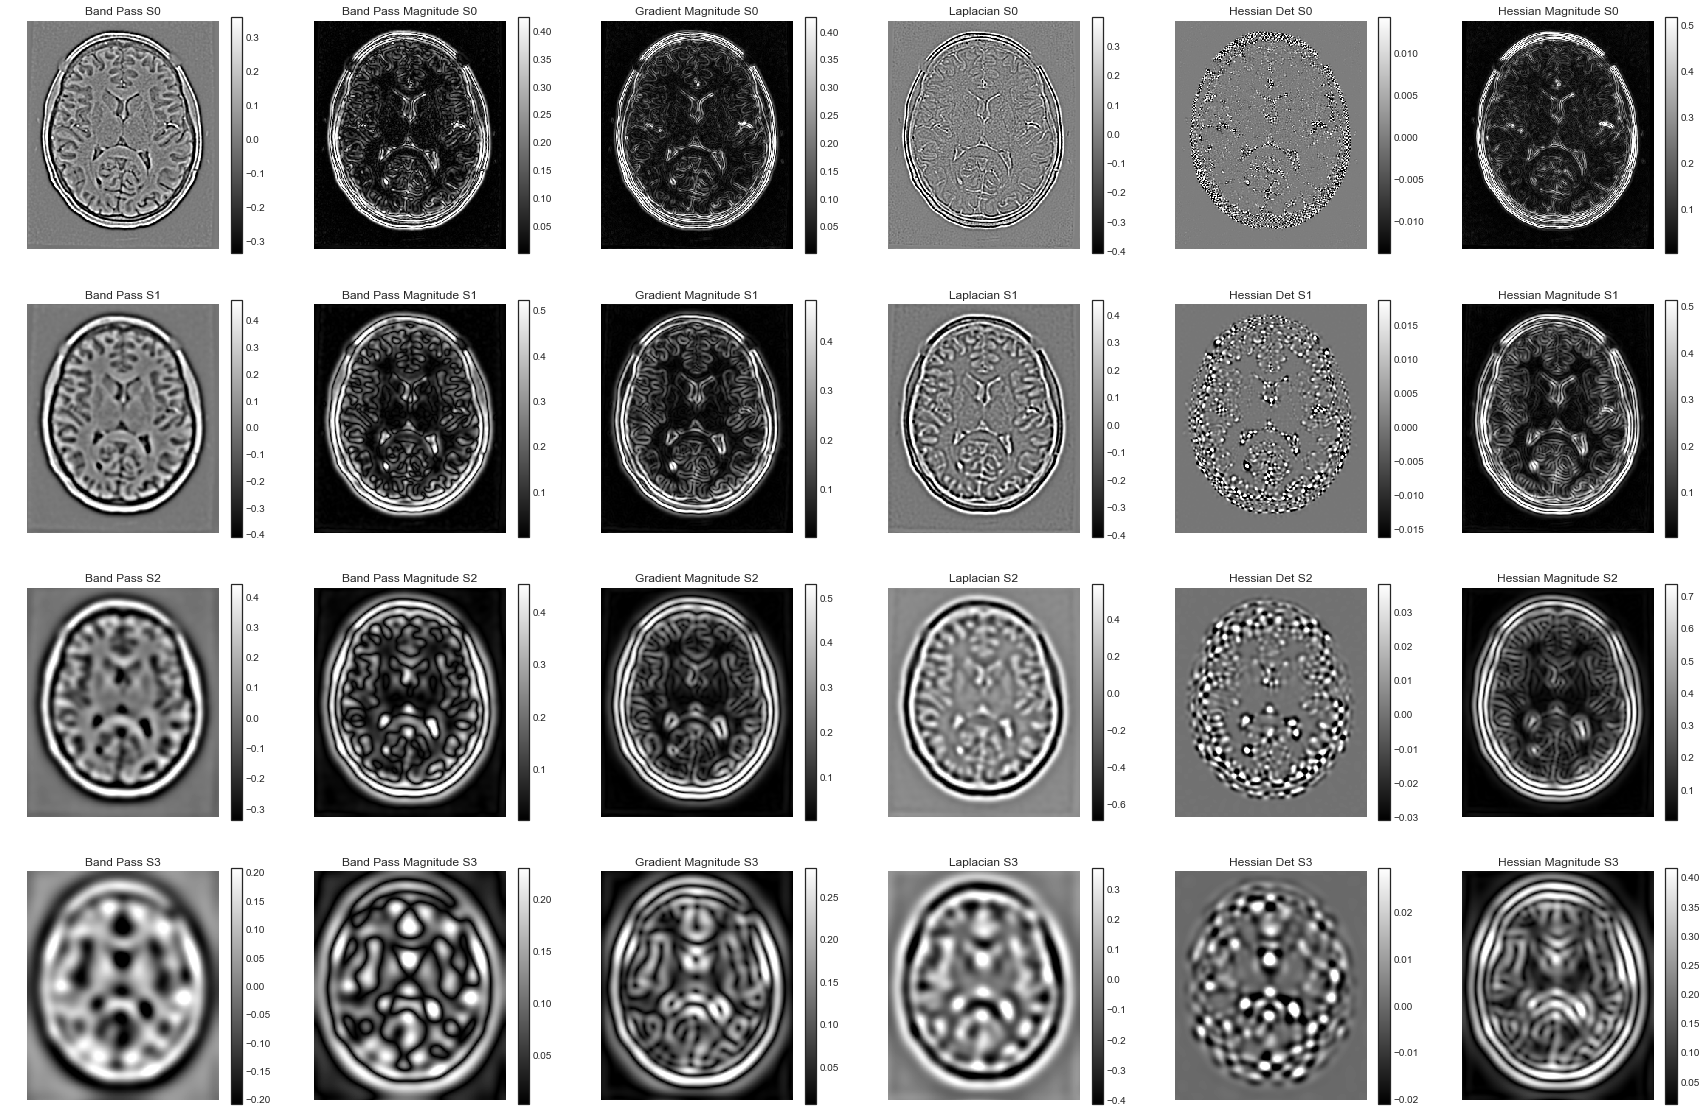

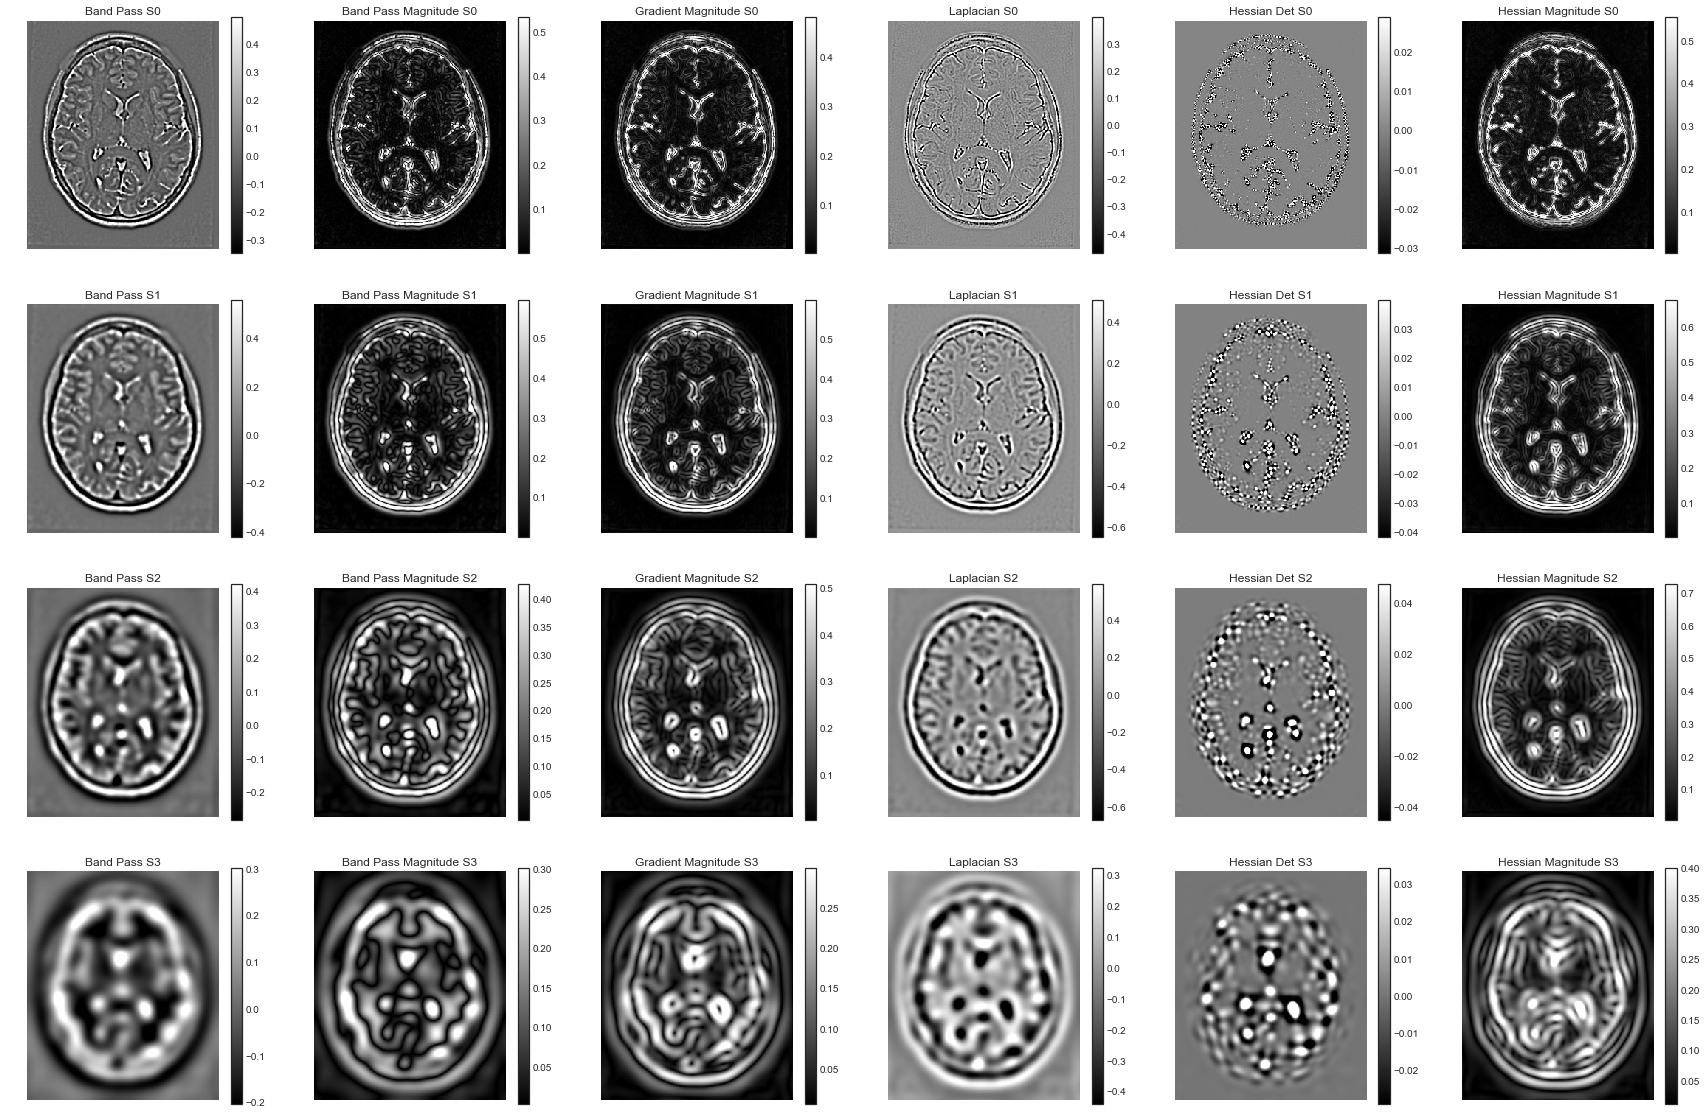

In [4]:
for data in [t1, t2]:

    feats, feat_names = riff(data, nscales)
    nfeats = len(feats)

    nrows = nscales
    ncols = nfeats//nscales
    plt.figure(figsize=[ncols*5, nrows*5])
    for n in range(nrows):
        for m in range(ncols):
            im_show_scale(feats[n*ncols+m], nrows, ncols, n*ncols+m+1, feat_names[n*ncols+m])
